# Customer Segmentation Using K-Means Clustering

### Motivations: 
Customer segmentation is the fundamental basis of recommendations to improve customer satisfaction and retention. Clustering customers help to identify users with similar behaviors, patterns or beliefs which helps companies provide accurate personalized services for the differnt kinds of customers. Clustering not only aids in providing a seamless experience for the users, but it also helps companies identify opportunities for growth and investment, as well as to distrubute resources according to each identified group.

For this project we are going to use K-Means clustering, with marketing data from [kaggle](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign) to create customer segmentation clusters. 

### Types of Clustering:
Clustering can be done in different ways, depending on business intentions and motivations. 

* **Geographic segmentation:** Clustering customers based on location. Can be used for projects such as identifying traffic patterns or identifying highest grossing products based on location.

* **Demographic segmentation:** Clustering individuals by personal similarities and motivations. For example, you clustering customers who regularly purchase diapers as recent parents vs those who do not as not-recent parents. Other examples include identifying the age and gender of the most loyal costumers, which can then help focus initiatives on retaining those customers. 

* **Psychographic segmentation:** Clustering individuals based on interests, beliefs and values. This can mean grouping individuals with similar taste in music, running patterns or preferred clothing brands.

* **Behavioral segmentation:** Clustering individuals based on their habits or actions such as app-usage or store-visit patterns. Can be used to identify involvement and sense of loyalty.

* **Needs-based segmentation:** Clustering individuals based on needs. For example, grouping customers that require home delivery options as a must-have.

* **Value-based segmentation:** Clustering customers based on their spending patterns, revenue and loyalty spending for the company. 

* **Technographic segmentation:** Clustering individuals by the way they use and access technology to reach services, or buy products. For example, identifying those that use desktop, mobile or external applications to complete transactions or access services. 



### Data:
Below we explore the different columns in the data and also group them into the different cluster-types we can formulate from the columns. 

#### Demographic segmentation: 
ID: Unique identifyer for each customer in the data <br>
Year_Birth: Year the customer was born <br>
Education: Customer's highest level of education <br>
Maritual Status: Whether customer is married or not  <br>
Income: Yearly income  <br>
Kidhome: Are there kids below 13 in the customer's home <br>
Teenhome: Are there kids above the age of 13 in the home <br>
Dt_customer: Date the customer signed up to purchase from the company <br>
Recency: How long it has been (days) since the customer visited the store <br> above 13 in the home <br>


#### Needs based segmentation / Value based segmentation:
The following columns contain information regarding spenditure in the last two years
MntWines: Amount spent on wine   <br>
MntFruits: Amount spent on food  <br>
MntMeatProducts: Amount spent on meat  <br>
MntFishProducts: Amount spent on fish <br>
MntSweetProducts: Amount spent on sweets <br>
MntGoldProds: Amount spent on gold products <br>

#### Technographic segmentation:
NumWebPurchases: Number of purchases made via company's website  <br>
NumCatalogPurchases: Number purchases made via company's catalog <br>
NumStorePurchases: Number of purchases made in store <br>
NumWebVisitsMonth: Number of times the customer visited the store in the last month<br>

#### Behavioral segmentation:
The following columns identify the customer's acceptance to advertisement campaigns, 1 if yes, 0 if not
AcceptedCmp1: Customers who accepted campaign's first attempt  <br>
AcceptedCmp2: Customers who accepted campaign's second attempt <br>
AcceptedCmp3: Customers who accepted campaign's third attempt<br>
AcceptedCmp4: Customers who accepted campaign's fourth attempt<br>
AcceptedCmp5: Customers who accepted campaign's fifth attempt <br>
Complain: Captures whether the customer complained(1) or not(0) in the past two years<br>


#### Value based segmentation:
Z_CostContact  <br>
Z_Revenue <br>
Response <br>
NumDealsPurchases: Purchases made by the customer using promotion/sale  <br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sklearn
from datetime import datetime, timedelta


In [34]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleaning:


Before we begin cleaning our columns, let's investigate some columns that we are not sure about: 
* Z_CostContract
* Z_Revenue
* Reponse

In [43]:
unknown_cols = ['Z_CostContact', 'Z_Revenue', 'Response']

for col in unknown_cols:
    print('Column description:', df[col].describe)
    print('Values in data:', df[col].unique())
    print()


Column description: <bound method NDFrame.describe of 0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2240, dtype: int64>
Values in data: [3]

Column description: <bound method NDFrame.describe of 0       11
1       11
2       11
3       11
4       11
        ..
2235    11
2236    11
2237    11
2238    11
2239    11
Name: Z_Revenue, Length: 2240, dtype: int64>
Values in data: [11]

Column description: <bound method NDFrame.describe of 0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64>
Values in data: [1 0]



By looking at the output above, we can see that each column holds the a single output: 3, 11 and 0 respectively. At this point, we would need to ask a domain expert to determine what these values mean and to better gaige their significance. Perhaps they signify something really important that we are overlooking. Let's assume the expert determines that the columns don't seem to be very useful for our project so we will begin by dropping them from our dataset.

In [5]:
df = df.drop(['Z_CostContact', 'Z_Revenue', 'Response'], axis=1)

Let's determine the rows that are missing all values in the dataset:

In [45]:
null_vals = df.loc[df.isnull().any(axis=1)]
null_vals

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


It looks like most of the values missing are from the Income column. We want to retain as much data as possible so we will replace the missing values with the mean, median or mode when we reach the Income column for cleaning processes. 

Identifying distribution of numerical values:

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the description above:
* We see that the income column is missing some values. <br>
* We see that the minimum year of birth is 1893 so we will need to confirm that this isn't a misentry. <br>
* We see that the the MntWines, MntFruits, MntMeat and MntFish products and Income columns have some pretty high 75 quantile and max values so we will need to inspect and confirm that. <br>
* It doesn't seem like we have any negative values in our dataset

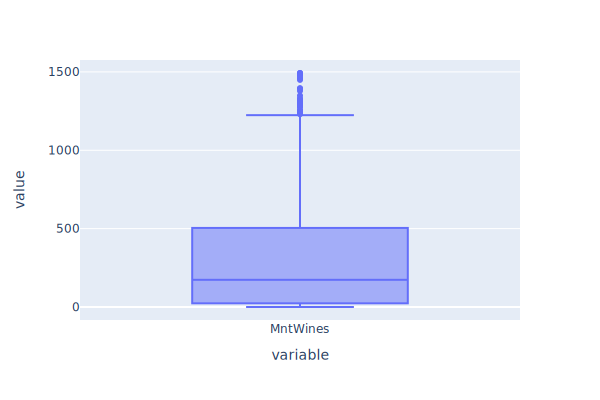

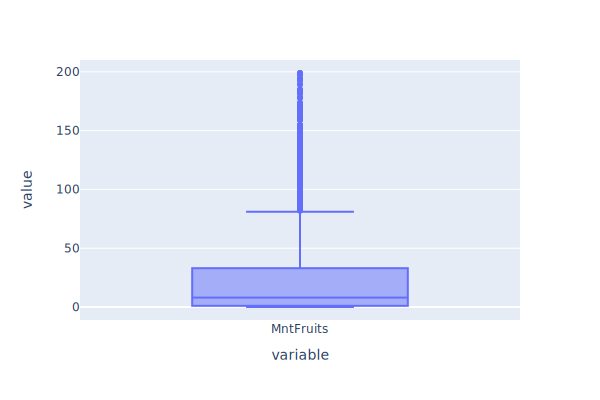

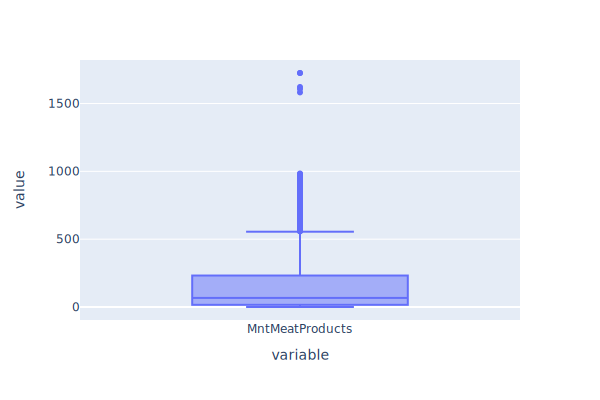

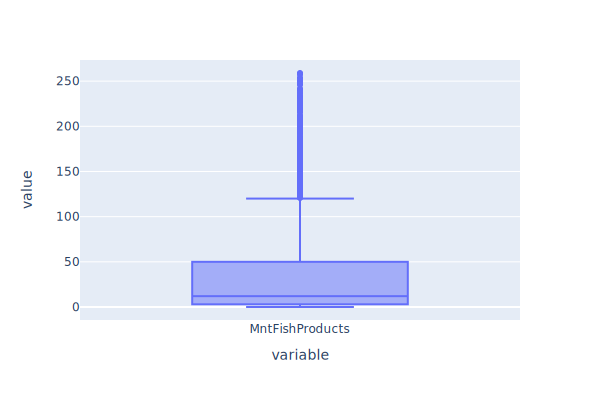

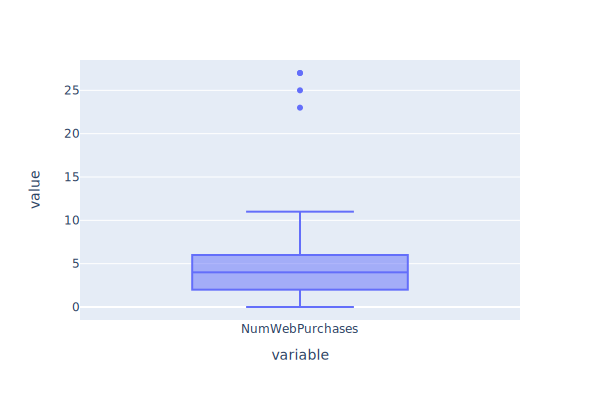

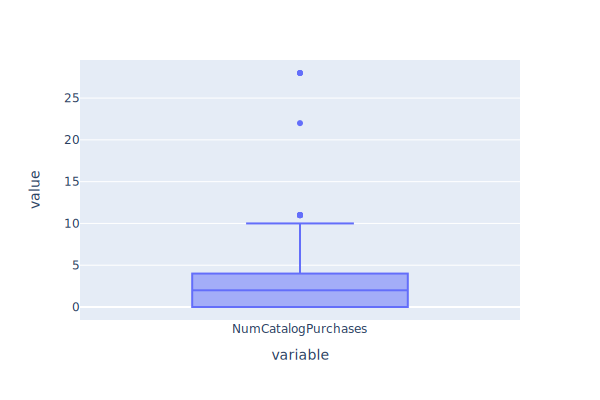

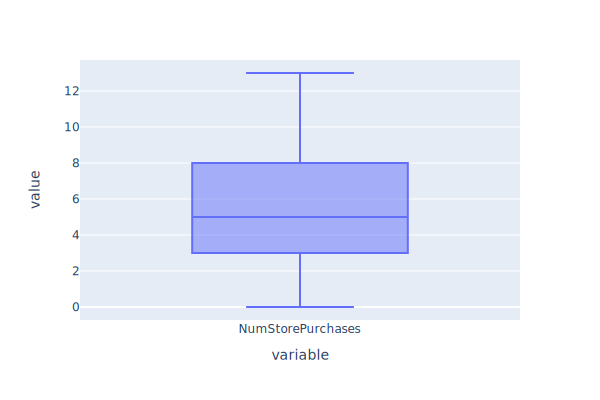

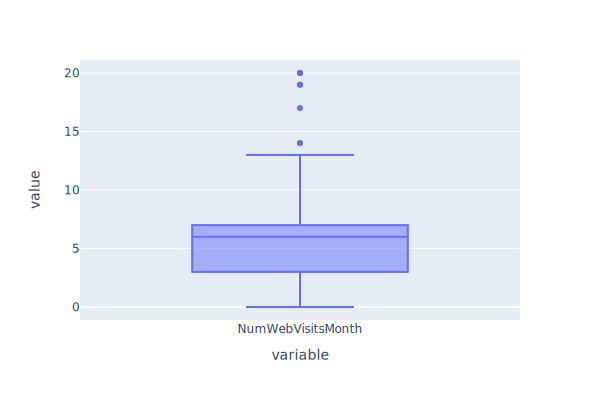

In [8]:
num_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth']
for feature in num_features:
    fig = px.box(df[feature],
    width=600, height=400
    )
    fig.show("svg")

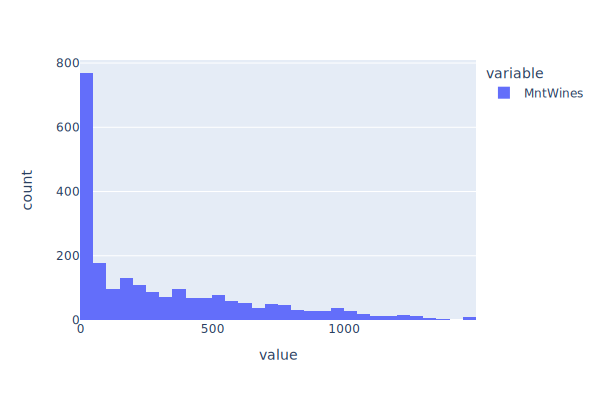

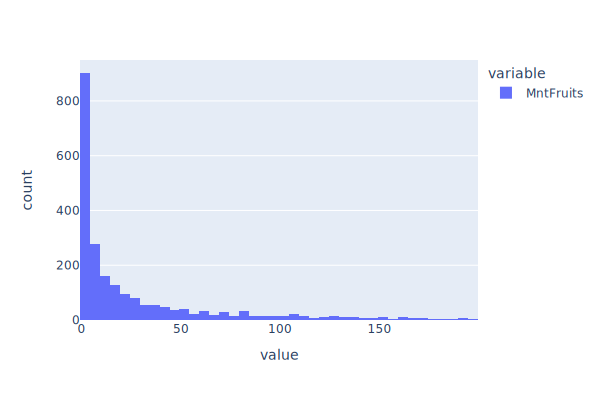

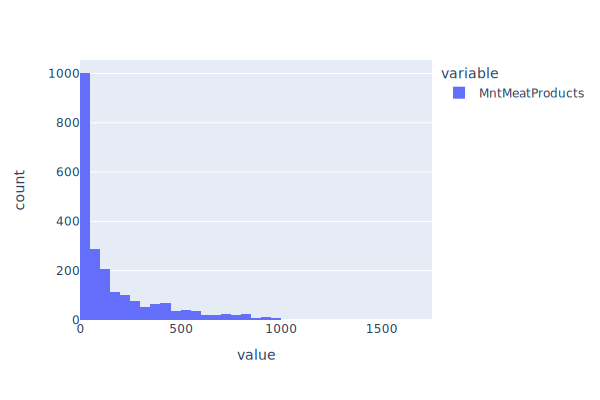

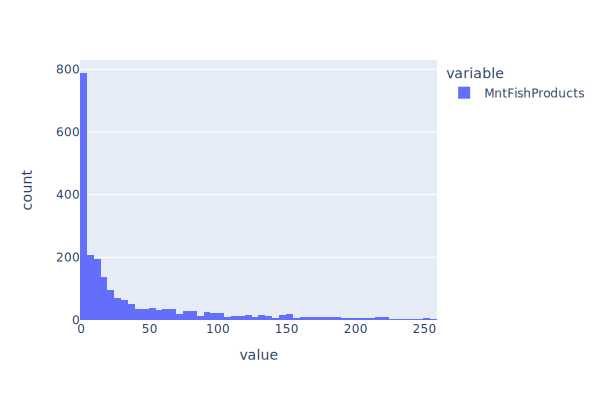

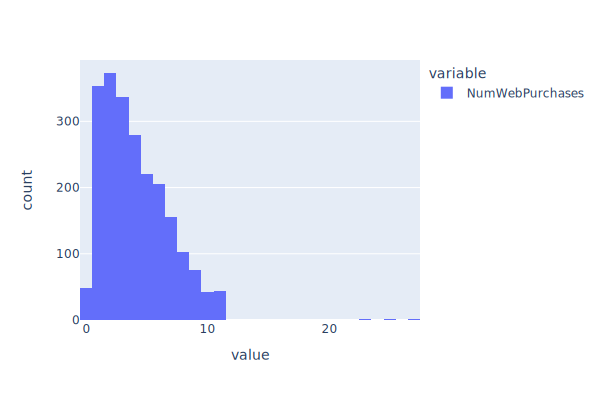

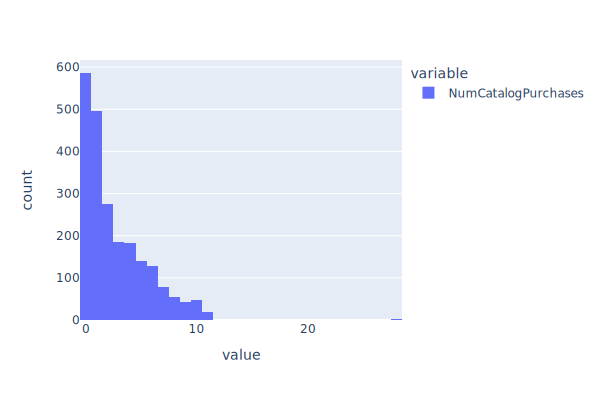

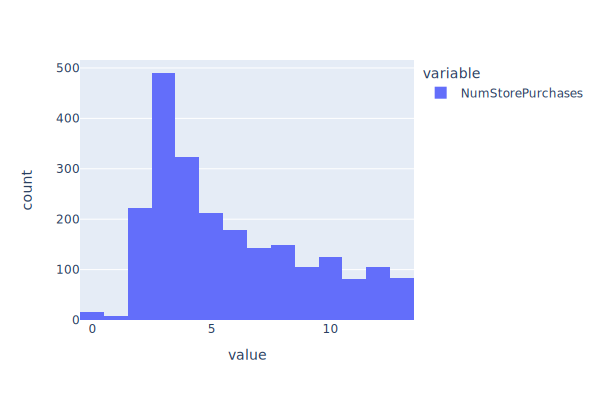

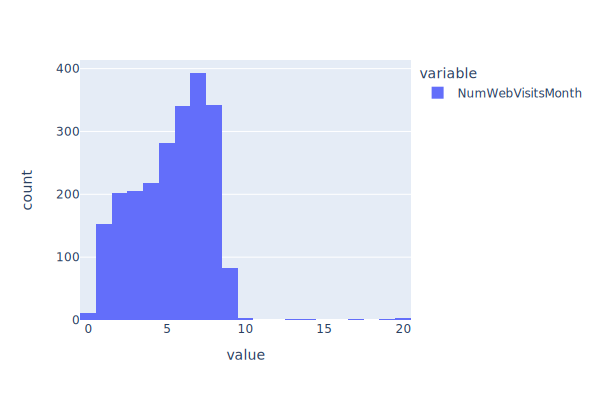

In [9]:
for feature in num_features:
    fig = px.histogram(df[feature],
    width=600, height=400
    )
    fig.show("svg")

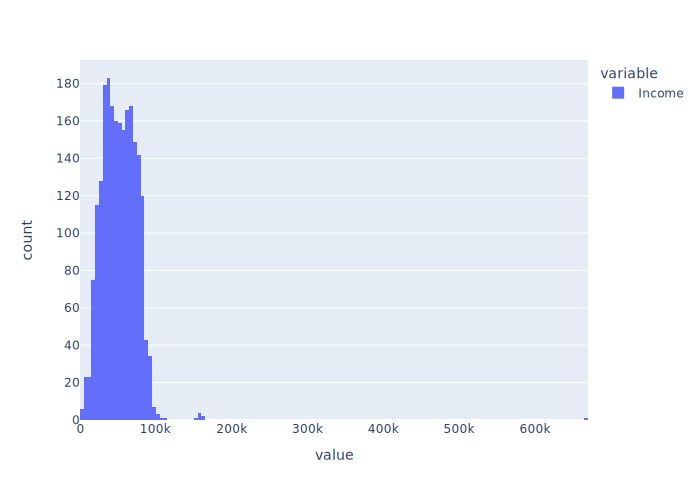

In [10]:
fig = px.histogram(df['Income'])
fig.show("svg")

### Data cleaning steps:
We will be thorough in cleaning our data. After all, you can build fancy, complicated algorithms but if the data is low quality, the outcome could be less than ideal. 

* Make sure each ID row is unique <br>
* Look at the Age columns to make sure that there are not typos or anomaly. For example, it would be impossible for someone born in 1876 to place an online order. We have many options to deal with these errors, and we'll explore them once we reach the age column section.<br>
* Find the empty values in the Education column and replace them with the most common value found in the dataset.<br>
* We'll look at the marital status column to make sure that there aren't any empty values. In addition, we'll make sure that married or divorced entries make sense. <br>
* We'll make sure that the income value entries are all numeric, and if they are empty we'll replace them with the median value and update the type to "int64" to match the other features<br>
* Kidhome and Teenhome should be numeric integer and no less than 0. No one can have a 1.5 kid, for example.
* We'll transform the Rencency column into integers to capture exact days by rounding floats to the nearest integers. <br>
* Identify and handle outliers in amount spent on goods. For example, did someone really spend 700 dollars of wine in one day? Maybe, it could have been a wholesale order but we don't want to apply that irregularity to our model since it isn't something that the average person would regularly do <br>
* We'll look for outliers in the product columns <br> 

### ID column
#### Determining if all ID entries are unique.
Running the cell below, we will see that there doesn't seem to be any duplicates in the ID columns so there is nothing to clean for that column

In [11]:
df['ID'].duplicated().value_counts()

ID
False    2240
Name: count, dtype: int64

### Age column

This data was collected in 2014, so that will be the threshold that we will measure from.

Let's look at the unique values in the **Year_Birth** column:

In [12]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

From the unique values we gathered above, it looks like some customers in the dataset were born in the 1800s and ealry 1900s. That means that some of the customers are 130 years old! Good for them, but bad for us because we can't accept that as reality. It is highly likely that this is due to error entries but we need to investigate further. If this were a real project, I would consult with the domain expert to determine what they think about these entries. However, for the sake of this project, let's assume that they are an entry mistake and the 1899 was supposed to be 1999, and 1900 was supposed to be 1990. 

We can address these rows in multiple ways:
* **Before we create age feature**: Assuming that these were entry-errors and these rows actually represent the youngest customers in our data, we can set a minimum year value for the 'Year_Birth' row and apply the minimum value to those entries
* **We can change these instances manually**: By updating the years in those erroneous rows to the years we think they would have been if entered properly, where 1899 is really 1999, and 1900 is 1990
* **We can address it after we create the age feature:** We can apply the median or mean age to those values or the minimum age
* **We can drop them**: There doesn't seem to be a lot of entries with these errors but our dataset is already of small size, and we would really like to capture as much data as possible

The thing to consider is that if these were data entry errors, these rows would be the youngest customers in the dataset. Do we assign them the youngest ages based on the other young rows, or do we run the risk and assume that they are actually old customers and add the oldest ages found in our dataset? Do we drop the columns? 

Let's look at some of these rows to make better sence of why this age discrepancies could be:


In [13]:
df[df['Year_Birth'] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,2,1,2,5,0,0,0,0,0,1
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,1,0,2,4,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,4,6,4,1,0,0,1,0,0,0


Well, this is interesting. If these were data entry errors, then it would mean that there were a lot of entry errors for these rows. 

**Let's time travel a little bit** 

If we assume entry errors and change the dates then: 
| Year Change | Age in 2014 | Age in 2023 |
| --- | --- | --- |
| 1900 --> 1990 | 24 | 33 |
| 1893 --> 1993 | 21 | 30 |
| 1899 --> 1999 | 15 | 24 |



If we change the rows then that would mean that one of the customers is 24 years old with a PhD, which is possible but if we look at when the data was collected (2014), it would mean that that customer was 15 years old at the time they reported having a PhD. Similarly, still focusing on 2014, it would mean that a 21 year old has a master's degree and a teenager at home. 

We may be overthinking it but if we were trying to capture insight for our customers in 2014 (assuming it was our best year ever), then these factors would need to be considered. This also begs the question, do we compute age based on 2014 or 2023?  

For the sake of this project, let's assume that the year is 2014 and we are analyzing our most recent data. We don't want to drop thsse values, and we don't know what happened with the entries in general so let's replace these these rows with the median. 

In [14]:
df['Year_Birth'].mask(df['Year_Birth'] <= 1900, 1970, inplace=True)

In [15]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1990, 1947, 1993, 1994, 1941, 1944, 1995,
       1940])

In [16]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.903125
std        11.694144
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Let's look at our youngest costumers:

In [47]:
youngest = df[df['Year_Birth'] >= 1990 ]
youngest

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
46,9909,1996,2n Cycle,Married,7500.0,0,0,09-11-2012,24,3,...,9,0,0,0,0,0,0,3,11,1
111,7431,1991,PhD,Single,68126.0,0,0,10-11-2012,40,1332,...,9,0,1,0,0,0,0,3,11,1
113,999,1991,Graduation,Single,86037.0,0,0,02-01-2013,95,490,...,3,0,1,1,0,0,0,3,11,1
140,821,1992,Master,Single,92859.0,0,0,19-10-2012,46,962,...,2,0,0,0,0,0,0,3,11,0
243,9529,1990,Graduation,Married,73687.0,0,0,28-11-2013,8,559,...,2,0,0,0,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,7600,1992,Basic,Single,15253.0,1,0,28-10-2013,13,1,...,7,0,0,0,0,0,0,3,11,0
2167,3520,1990,Master,Single,91172.0,0,0,27-03-2013,94,162,...,3,1,0,1,1,1,0,3,11,1
2200,7620,1990,Basic,Single,16185.0,1,0,05-08-2013,71,5,...,8,0,0,0,0,0,0,3,11,0
2204,1876,1990,Graduation,Married,18929.0,0,0,16-02-2013,15,32,...,6,0,0,0,0,0,0,3,11,0


It appears the 18 year olds represented in the data are both married, and one of them has a master's degree. We'll address these in the corresponding features further on.

In [48]:
def create_age_col(df):
    df['Age']= df['Year_Birth'].apply(lambda x: 2014 - x )
    df['Year_Birth'].mask(df['Year_Birth'] <= 1900, 1970, inplace=True)
    age_col = df.pop('Age')
    df.insert(1, 'Age', age_col)
    df = df.drop('Year_Birth', axis=1)
    return df

In [49]:
df = create_age_col(df)
df.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,57,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,60,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,49,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,30,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,33,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [50]:
print(df['Age'].describe())

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64


In [52]:
youngest2 = (df['Age'] <= 21) == True
youngest2

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Age, Length: 2240, dtype: bool

Let's plot our new distribution of ages: 

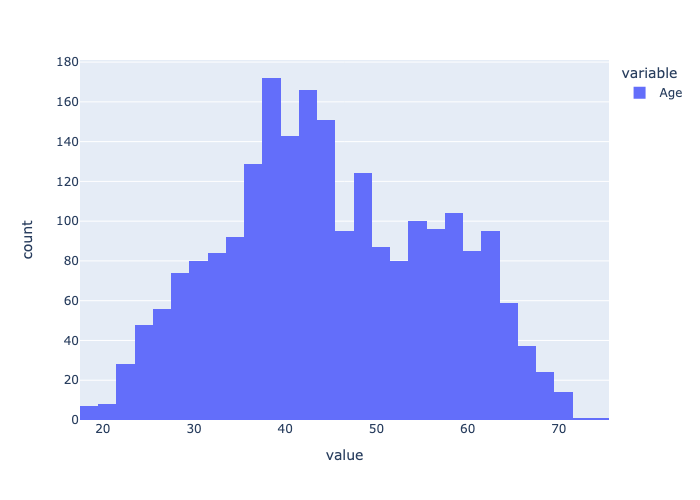

In [21]:
fig = px.histogram(df['Age'])
fig.show('png')

We have succesfully cleaned our 'Year_Birth' column and created our 'Age' column to replace it.

### Education column:

Le'ts update the education column and transform the values to US standards. Based on a quick online research, we need to find to change the values as such: 

Basic -->  Associate degree <br>
Graduation --> Bachelors <br>
2n Cyle/Master --> Master's degree<br>
PhD --> PhD 


In [22]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [23]:
def clean_education_col(df):
    df['Education'] = df['Education'].replace({
    'Basic': 'Associates',
    'Graduation': 'Bachelors',
    '2n Cycle': 'Masters',
    'Master': 'Masters',
    })
    return df

In [24]:
df = clean_education_col(df)

In [25]:
df['Education'].unique()

array(['Bachelors', 'PhD', 'Masters', 'Associates'], dtype=object)

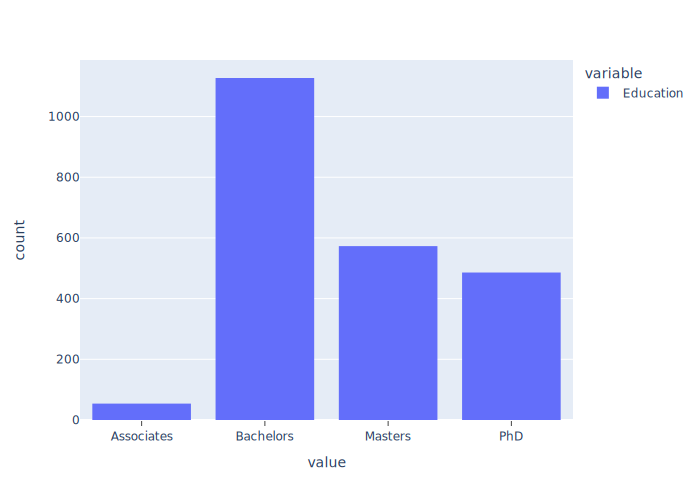

In [26]:
fig = px.histogram(df['Education'])
fig.update_xaxes(type='category', categoryorder='category ascending', ticks='outside')
fig.show('svg')

### Martial_Status column

Below we can see the different entries for 'Marital_Status', and it looks like we need to replace some of those entries assuming that 'Alone', 'Absurd', and 'YOLO' fall under the 'Single' category.

In [27]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [28]:
def clean_marital_col(df): 
    df['Marital_Status']= df['Marital_Status'].replace(
            {'Together': 'Married',
            'Alone': 'Single',
            'Absurd': 'Single',
            'YOLO': 'Single'}) 
    return df

In [29]:
df = clean_marital_col(df)
df

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,5524,57,Bachelors,Single,58138.0,0,0,04-09-2012,58,635,...,8,10,4,7,0,0,0,0,0,0
1,2174,60,Bachelors,Single,46344.0,1,1,08-03-2014,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,49,Bachelors,Married,71613.0,0,0,21-08-2013,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,30,Bachelors,Married,26646.0,1,0,10-02-2014,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,33,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Bachelors,Married,61223.0,0,1,13-06-2013,46,709,...,9,3,4,5,0,0,0,0,0,0
2236,4001,68,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,8,2,5,7,0,0,0,1,0,0
2237,7270,33,Bachelors,Divorced,56981.0,0,0,25-01-2014,91,908,...,2,3,13,6,0,1,0,0,0,0
2238,8235,58,Masters,Married,69245.0,0,1,24-01-2014,8,428,...,6,5,10,3,0,0,0,0,0,0


It looks like we successfully cleaned the 'Marital_Status' column by reducing the categories, to confirm run the cell below:

In [30]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

### Income column

In [31]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Let's clean missing or non-numeric values: 

In [32]:
null_vals = df.loc[df.isnull().any(axis=1)]
null_vals

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
10,1994,31,Bachelors,Married,NaN,1,0,15-11-2013,11,5,...,1,0,2,7,0,0,0,0,0,0
27,5255,28,Bachelors,Single,NaN,1,0,20-02-2013,19,5,...,27,0,0,1,0,0,0,0,0,0
43,7281,55,PhD,Single,NaN,0,0,05-11-2013,80,81,...,1,3,4,2,0,0,0,0,0,0
48,7244,63,Bachelors,Single,NaN,2,1,01-01-2014,96,48,...,2,1,4,6,0,0,0,0,0,0
58,8557,32,Bachelors,Single,NaN,1,0,17-06-2013,57,11,...,2,0,3,6,0,0,0,0,0,0
71,10629,41,Masters,Married,NaN,1,0,14-09-2012,25,25,...,3,0,3,8,0,0,0,0,0,0
90,8996,57,PhD,Married,NaN,2,1,19-11-2012,4,230,...,7,2,8,9,0,0,0,0,0,0
91,9235,57,Bachelors,Single,NaN,1,1,27-05-2014,45,7,...,1,0,2,7,0,0,0,0,0,0
92,5798,41,Masters,Married,NaN,0,0,23-11-2013,87,445,...,2,4,8,1,0,0,0,0,0,0
128,8268,53,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,1,7,6,0,0,0,0,0,0


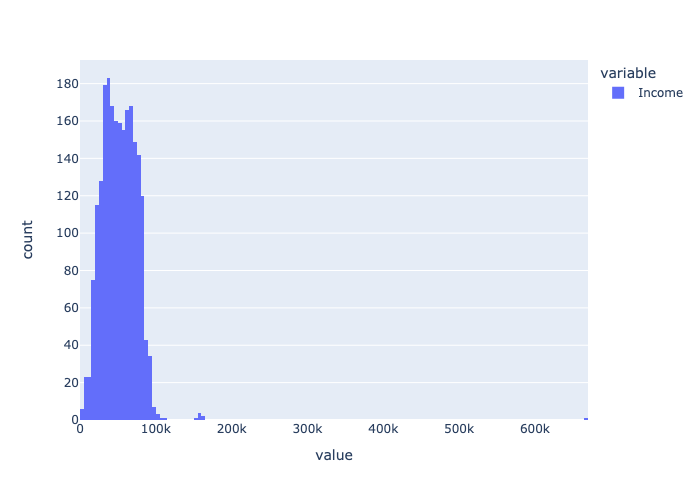

In [33]:
fig = px.histogram(df['Income'])
fig.show('png')

# Todo:



### TeenatHome
Look into who has teenagers
Can you have a teenager if you are younger than___

## Feature engineering:
* **Age:** Using Year_Birth feature to create an age column for each unique customer <br>
* **Loyalty_since:** We'll be using the Dt_customer to determine the time the customer has been a member of the company based from the most recent input in the dataset, and we'll convert it from type "object" to "int64" <br>
* **Total_goods:** We'll be adding all the products to create a general amount of goods spent by the customer <br>
* **Edu_leve_US:** Updating this column to reflect standard US expressions. In the dataset, "Graduation" means that the customer completed a Bachelor's degree, and "2nd Cycle" means Master's degree <br>
